In [5]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind 
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import levene
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

# Load the CSV file into a pandas dataframe
csv_path = "/Users/anthonychou/Desktop/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv"
df = pd.read_csv(csv_path)

Research Question 1
# Does gender and race affect the amount of times a person is arrested?



Research Question 2
# Does race and occurance type affect the amount of times a person is stripsearched?


# EDA

# Data Cleaning

In [6]:
#Drop unused columns 
df = df.drop(columns=['Arrest_Year', 'Arrest_Month', 'EventID', 
                      'ArrestLocDiv', 'Actions_at_arrest___Concealed_i', 'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d', 
                      'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o', 'Actions_at_arrest___Cooperative', 'ItemsFound', 'ObjectId'])


In [7]:
#Drop U since it skews with our model and have only 9 observations (outliers)
df = df.drop(df[df['Sex'] == 'U'].index)

In [8]:
#Recode Age
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace('Aged 65 and older', 'Aged 65 years and older')
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace('Aged 17 years and under', 'Aged 17 years and younger')


In [9]:
#Organizing crimes into Assualt, Aggrevated Assault, Non Violence, Compliance and others
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Assault & Other crimes against persons', 'Assault')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Drug Related', 'Assault')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Harassment/Threatening', 'Assault')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Harassment & Threatening', 'Assault')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Break & Enter', 'Assault')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Break and Enter', 'Assault')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Robbery/Theft', 'Assault')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Robbery & Theft', 'Assault')

df['Occurrence_Category'] = df['Occurrence_Category'].replace('Weapons', 'Aggrevated Assault')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Weapons & Homicide', 'Aggrevated Assault')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Sexual Related Crime', 'Aggrevated Assault')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Sexual Related Crimes & Crimes Against Children', 'Aggrevated Assault')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Homicide', 'Aggrevated Assault')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Crimes against Children', 'Aggrevated Assault')

df['Occurrence_Category'] = df['Occurrence_Category'].replace('Vehicle Related', 'Vehicle Related (inc. Impaired)')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Impaired', 'Vehicle Related (inc. Impaired)')

df['Occurrence_Category'] = df['Occurrence_Category'].replace('FTA/FTC/Compliance Check/Parollee', 'Compliance')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('FTA/FTC, Compliance Check & Parollee', 'Compliance')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Police Category - Administrative', 'Compliance')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Other Statute & Other Incident Type', 'Compliance')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Other Offence', 'Compliance')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('LLA', 'Compliance')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Police Category - Incident', 'Compliance')

df['Occurrence_Category'] = df['Occurrence_Category'].replace('Mischief', 'Mischief & Fraud')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Fraud', 'Mischief & Fraud')

df['Occurrence_Category'] = df['Occurrence_Category'].replace('Mental Health', 'Other Statute')

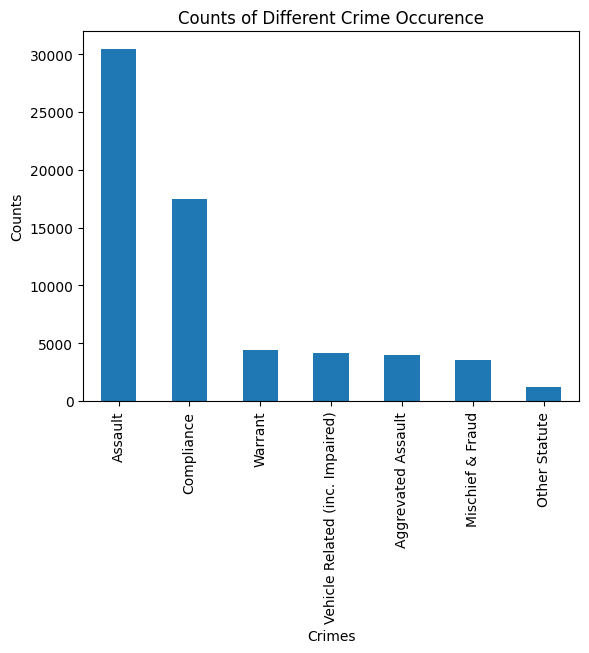

Assault                            30441
Compliance                         17473
Warrant                             4384
Vehicle Related (inc. Impaired)     4107
Aggrevated Assault                  3986
Mischief & Fraud                    3528
Other Statute                       1183
Name: Occurrence_Category, dtype: int64


In [10]:
#Plot Histogram for Occurrence Category
Occurrence_Category_counts = df['Occurrence_Category'].value_counts()
Occurrence_Category_counts.plot(kind='bar')
plt.xlabel('Crimes')
plt.ylabel('Counts')
plt.title('Counts of Different Crime Occurence')
plt.show()
print(Occurrence_Category_counts)

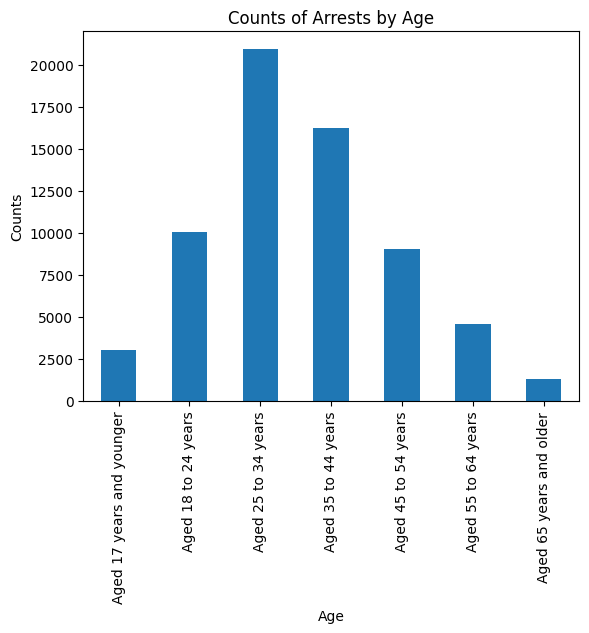

In [11]:
#Plot histogram for age counts 
age_counts = df['Age_group__at_arrest_'].value_counts()
# sort the values in ascending order
age_counts_sorted = age_counts.reindex(['Aged 17 years and younger','Aged 18 to 24 years','Aged 25 to 34 years','Aged 35 to 44 years','Aged 45 to 54 years','Aged 55 to 64 years','Aged 65 years and older'])
# create a bar chart with the sorted values
age_counts_sorted.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Counts of Arrests by Age')
plt.show()

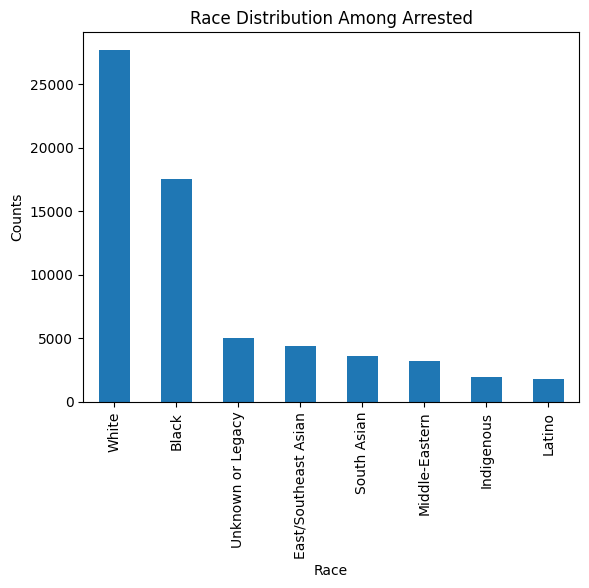

White                   27718
Black                   17526
Unknown or Legacy        5053
East/Southeast Asian     4415
South Asian              3613
Middle-Eastern           3237
Indigenous               1934
Latino                   1767
Name: Perceived_Race, dtype: int64


In [12]:
#We want to investigate the amount of arrests made between different Races
race_counts = df['Perceived_Race'].value_counts()
race_counts.plot(kind='bar')
plt.xlabel('Race')
plt.ylabel('Counts')
plt.title('Race Distribution Among Arrested')
plt.show()
print(race_counts)

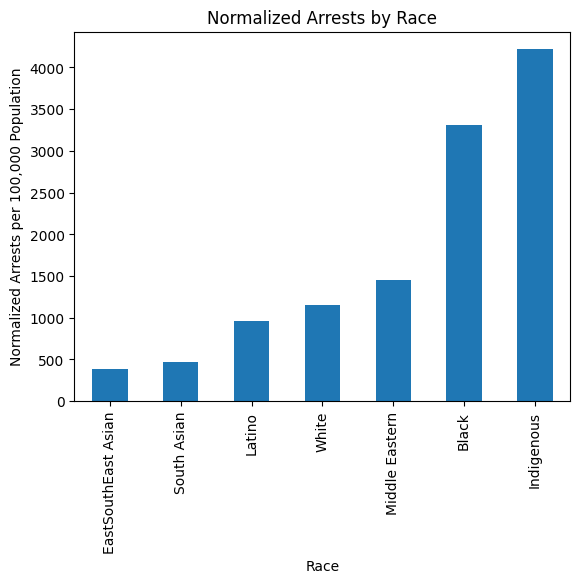

In [13]:
#Using data complied from wikipedia, we want to discover the per 100,000 person arrest rate 
Normalized_White_Arrest = (27723/1201075)*100000/2
Normalized_Black_Arrest = (17526/265005)*100000/2
Normalized_EastSouthEast_Asian_Arrest = (4415/575885)*100000/2
Normalized_South_Asian_Arrest = (3613/385440)*100000/2
Normalized_Middle_Eastern_Arrest = (3237/111360)*100000/2
Normalized_Indigenous_Arrest = (1934/22925)*100000/2
Normalized_Latino_Arrest = (1768/92455)*100000/2
#Create normalized data 
Normalized_Race_Data = {'Race': ['EastSouthEast Asian', 'South Asian', 'Latino','White', 'Middle Eastern' ,'Black', 'Indigenous'],
        'Normalized Arrests': [Normalized_EastSouthEast_Asian_Arrest, Normalized_South_Asian_Arrest, Normalized_Latino_Arrest,Normalized_White_Arrest, 
                               Normalized_Middle_Eastern_Arrest,Normalized_Black_Arrest, Normalized_Indigenous_Arrest, ]}
NRD = pd.DataFrame(Normalized_Race_Data)

normalizedplot = NRD.plot(kind='bar', x='Race', y='Normalized Arrests', legend=False)

# add labels and title
normalizedplot.set_xlabel('Race')
normalizedplot.set_ylabel('Normalized Arrests per 100,000 Population')
normalizedplot.set_title('Normalized Arrests by Race')

# show the plot
plt.show()

In [14]:
#Using PersonID, we create a total arrest column, documenting the arrest count of each individual
df['TotalArrests'] = df.groupby('PersonID').PersonID.transform('count')

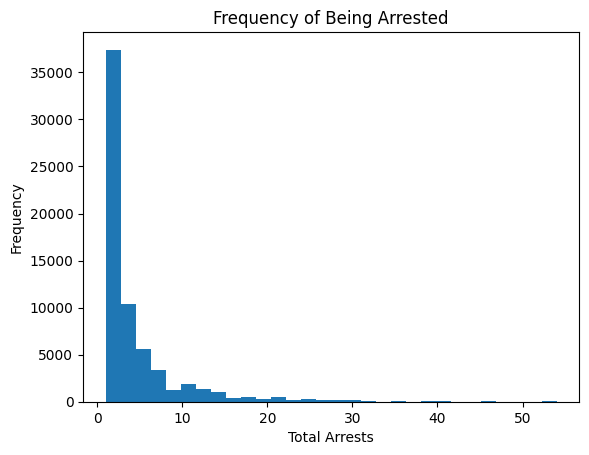

In [15]:
#Plot histogram of Total Arrests
plt.hist(df['TotalArrests'], bins=30)
plt.xlabel('Total Arrests')
plt.ylabel('Frequency')
plt.title('Frequency of Being Arrested')
df.dropna(subset=['TotalArrests'], inplace=True)
df['TotalArrests'] = pd.to_numeric(df['TotalArrests'], errors='coerce')
df = df.drop(df[df['TotalArrests'] == 'nan'].index)

In [16]:
#Total Arrest Anderson Darling Test
total_arrests = df['TotalArrests']
result = anderson(total_arrests)
print('Statistic:', result.statistic)
print('Critical Values:', result.critical_values)
print('Significance Level:', result.significance_level)

Statistic: 7688.610529755155
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Significance Level: [15.  10.   5.   2.5  1. ]


In [17]:
#We want to see if there are any bias in the number of strip search conducted 
df_strip_search = df[df['StripSearch'] == 1].groupby('PersonID').agg({'StripSearch': 'sum', 'Perceived_Race': 'first', 'Occurrence_Category': 'first'})
print(df_strip_search)

          StripSearch     Perceived_Race Occurrence_Category
PersonID                                                    
300003              1              White    Mischief & Fraud
300007              1        South Asian          Compliance
300015              1  Unknown or Legacy             Assault
300036              2              Black             Assault
300043              2              White             Warrant
...               ...                ...                 ...
337327              1        South Asian             Assault
337328              3        South Asian             Assault
337338              2              White             Assault
337341              2              White             Warrant
337344              1              Black  Aggrevated Assault

[5046 rows x 3 columns]


In [18]:
stripsearch_data_total = df_strip_search['StripSearch']
result = anderson(stripsearch_data_total)
print('Statistic:', result.statistic)
print('Critical Values:', result.critical_values)
print('Significance Level:', result.significance_level)

Statistic: 891.6626589417447
Critical Values: [0.576 0.655 0.786 0.917 1.091]
Significance Level: [15.  10.   5.   2.5  1. ]


## Two Sample T Test 1
Race & Total Arrest

In [19]:
# separate the samples based on race
race_white = df[df['Perceived_Race'] == 'White']['TotalArrests']
race_indigenous = df[df['Perceived_Race'] == 'Indigenous']['TotalArrests']

In [20]:
# Using levene test to check equal varaince
stat, p = levene(race_white,race_indigenous)
p
#Small p-value suggest not equal variance

3.475019136286763e-56

In [21]:
# conduct the two-sample t-test
t_stat, p_value = ttest_ind(race_white, race_indigenous, equal_var=False)

# print the results
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

t-statistic:  -15.421141421132969
p-value:  7.54377686889691e-51


<Figure size 2000x1600 with 0 Axes>

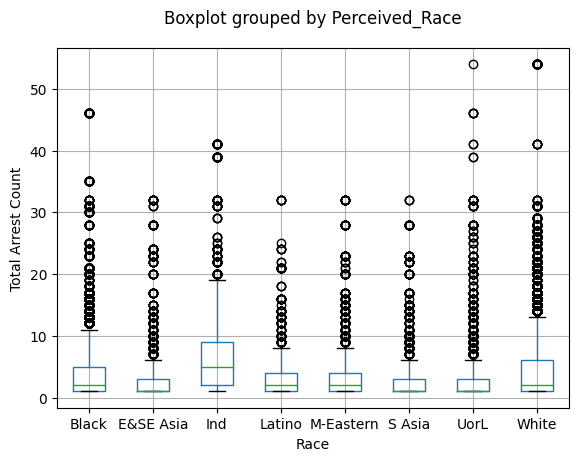

In [22]:
#Create Box Plot for Arrest between different races 
RaceArrest = df[['Perceived_Race', 'TotalArrests']]
plt.figure(figsize=(20, 16))
RaceArrest.boxplot(by='Perceived_Race')
plt.xlabel('Race')
plt.ylabel('Total Arrest Count')
plt.title('')
plt.xticks(ticks=[1,2,3,4,5,6,7,8], labels=['Black','E&SE Asia','Ind','Latino','M-Eastern','S Asia','UorL','White'])
plt.show()

We observe that there exhibit significant different in arrest account in Indigenous and White. We also posted a boxplot describing the Total Arrest count between different races. 

# T-Test 2 Sex and Total Arrest

In [23]:
# Using levene test to check equal varaince
stat, p = levene(df[df['Sex'] == 'M']['TotalArrests'], df[df['Sex'] == 'F']['TotalArrests'])

print(p)
#Small p-value suggest not equal variance

0.0030446290960980302


In [24]:
gender_male = df[df['Sex'] == 'M']['TotalArrests']
gender_female =df[df['Sex'] == 'F']['TotalArrests']

# conduct the two-sample t-test
t_stat, p_value = ttest_ind(gender_male, gender_female, equal_var=False)

# print the results
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

t-statistic:  5.513241856509094
p-value:  3.5650802749130724e-08


<Figure size 3000x2400 with 0 Axes>

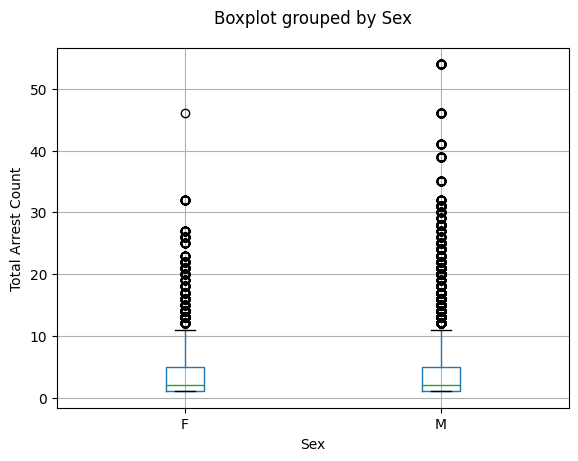

In [25]:
#Create Box Plot for Arrest between different gender
SexArrest = df[['Sex', 'TotalArrests']]
plt.figure(figsize=(30, 24))
SexArrest.boxplot(by='Sex')
plt.xlabel('Sex')
plt.ylabel('Total Arrest Count')
plt.title('')
plt.show()

We observe that there exhibit significant different in arrest account in different genders.

# T Test 3 Age and Total Arrest

In [26]:
# Using levene test to check equal varaince
stat, p = levene(df[df['Age_group__at_arrest_'] == 'Aged 25 to 34 years']['TotalArrests'], df[df['Age_group__at_arrest_'] == 'Aged 35 to 44 years']['TotalArrests'])

print(p)
#p value = 0.06 suggests equal variance

0.061093314405129995


In [27]:
age_2534 = df[df['Age_group__at_arrest_'] == 'Aged 25 to 34 years']['TotalArrests']
age_3544 = df[df['Age_group__at_arrest_'] == 'Aged 35 to 44 years']['TotalArrests']

# conduct the two-sample t-test
t_stat, p_value = ttest_ind(age_2534, age_3544, equal_var=True)

# print the results
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

t-statistic:  -2.7195361023993927
p-value:  0.006540390665738553


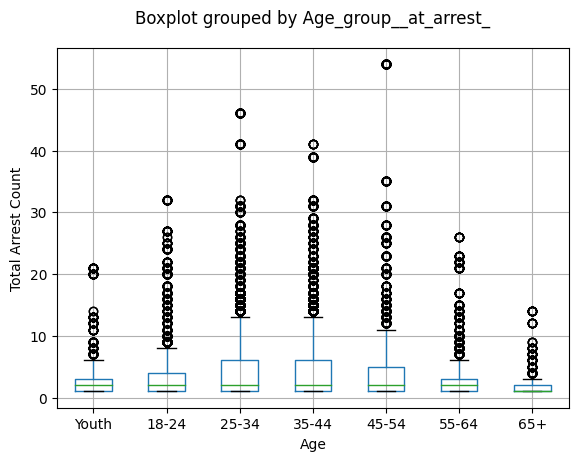

In [28]:
#Create Box Plot for Arrest between different ages
AgeArrest = df[['Age_group__at_arrest_', 'TotalArrests']]
AgeArrest.boxplot(by='Age_group__at_arrest_')
plt.xlabel('Age')
plt.ylabel('Total Arrest Count')
plt.xticks(ticks=[1,2,3,4,5,6,7], labels=['Youth','18-24','25-34','35-44','45-54','55-64','65+'])
plt.title('')
plt.show()

We observe that there exhibit significant different in arrest account in 25-34 years old and 35 to 44 years old. 

# T Test 4 Strip Search and Race


In [29]:
# Using levene test to check equal varaince
stat, p = levene(df_strip_search[df_strip_search['Perceived_Race'] == 'White']['StripSearch'], df_strip_search[df_strip_search['Perceived_Race'] == 'Indigenous']['StripSearch'])

print(p)
#Small p-value suggest not equal variance

0.0036482105652317297


In [30]:
strip_data_white = df_strip_search[df_strip_search['Perceived_Race'] == 'White']['StripSearch']
strip_data_indigenous = df_strip_search[df_strip_search['Perceived_Race'] == 'Indigenous']['StripSearch']

# conduct the two-sample t-test
t_stat, p_value = ttest_ind(strip_data_white, strip_data_indigenous, equal_var=False)

# print the results
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

t-statistic:  -2.225623430786722
p-value:  0.027426093768627386


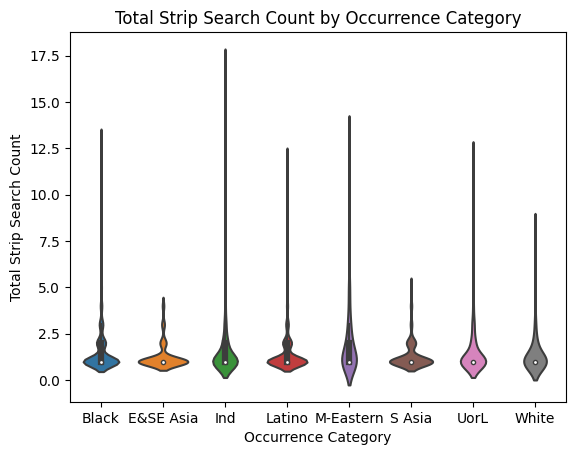

In [31]:
#Create Violin Plot to visualize data
sns.violinplot(x='Perceived_Race', y='StripSearch', data=df_strip_search)
plt.xlabel('Occurrence Category')
plt.ylabel('Total Strip Search Count')
plt.title('Total Strip Search Count by Occurrence Category')
plt.xticks(ticks=[0,1,2,3,4,5,6,7], labels=['Black','E&SE Asia','Ind','Latino','M-Eastern','S Asia','UorL','White'])
plt.show()

# T Test 5 Occurrence Category and Strip Search

In [32]:
# Using levene test to check equal varaince
stat, p = levene(df_strip_search[df_strip_search['Occurrence_Category'] == 'Assault']['StripSearch'], df_strip_search[df_strip_search['Occurrence_Category'] == 'Compliance']['StripSearch'])

print(p)
#Small p-value suggest not equal variance

6.236284150632088e-05


In [33]:
#Two sample t test on Assault and Complince
strip_data_assault = df_strip_search[df_strip_search['Occurrence_Category'] == 'Assault']['StripSearch']
strip_data_compliance = df_strip_search[df_strip_search['Occurrence_Category'] == 'Compliance']['StripSearch']

# conduct the two-sample t-test
t_stat, p_value = ttest_ind(strip_data_assault, strip_data_compliance, equal_var=False)

# print the results
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

t-statistic:  -3.6030461218084784
p-value:  0.000326441575761461


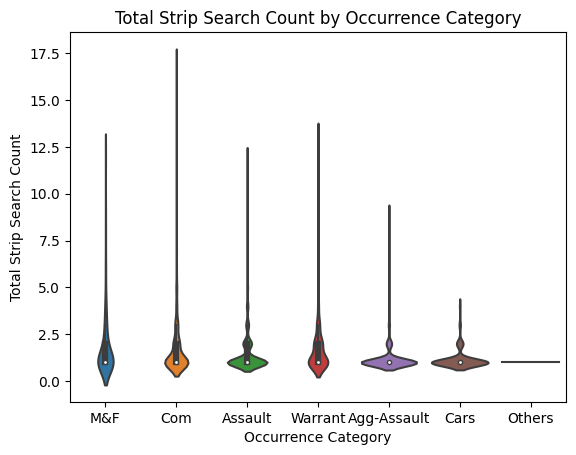

In [34]:
#Violin plot of strip search by category
sns.violinplot(x='Occurrence_Category', y='StripSearch', data=df_strip_search)
plt.xlabel('Occurrence Category')
plt.ylabel('Total Strip Search Count')
plt.title('Total Strip Search Count by Occurrence Category')
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['M&F','Com','Assault','Warrant','Agg-Assault','Cars','Others'])

plt.show()

Text(0.5, 1.0, 'Box Plot of Total Arrests By Race and Sex')

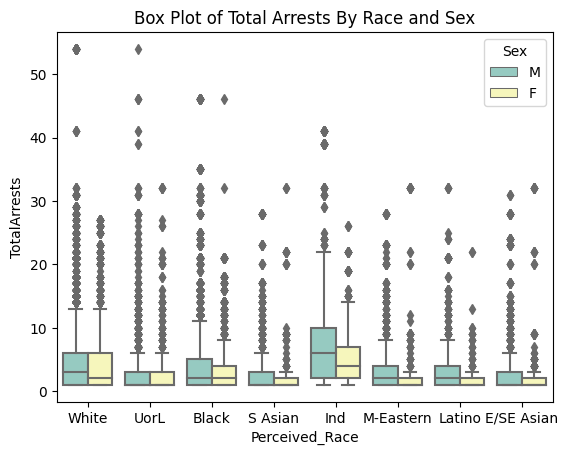

In [35]:
# Model 1 EDA Checking with boxplots
sns.boxplot(x="Perceived_Race", y="TotalArrests", hue="Sex", data=df, palette="Set3") 
plt.xticks(ticks=[0,1,2,3,4,5,6,7], labels=['White','UorL','Black','S Asian','Ind','M-Eastern','Latino','E/SE Asian'])
plt.title('Box Plot of Total Arrests By Race and Sex')


Text(0.5, 1.0, 'Box Plot of Strip Search by Occurrence Category and Race')

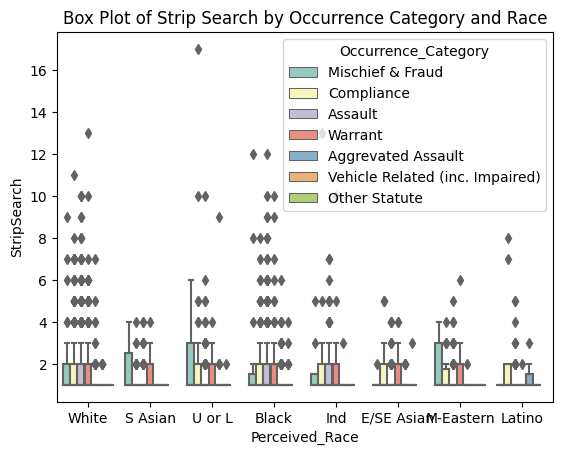

In [36]:
# Model 2 EDA Checking with boxplots
sns.boxplot(x="Perceived_Race", y="StripSearch", hue="Occurrence_Category", data=df_strip_search, palette="Set3") 
plt.xticks(ticks=[0,1,2,3,4,5,6,7], labels=['White','S Asian','U or L','Black','Ind','E/SE Asian','M-Eastern','Latino'])
plt.title('Box Plot of Strip Search by Occurrence Category and Race')


Now moving on to ANOVA tests

In [37]:
model1 = ols('TotalArrests ~ C(Sex, Treatment("M")) + C(Perceived_Race, Treatment("East/Southeast Asian")) + C(Perceived_Race, Treatment("East/Southeast Asian")):C(Sex, Treatment("M"))', data=df).fit()
sm.stats.anova_lm(model1, typ=2)


,sum_sq,df,F,PR(>F)
"C(Sex, Treatment(""M""))",2.436271e+03,1.0,86.290146,1.599788e-20
"C(Perceived_Race, Treatment(""East/Southeast Asian""))",5.844325e+04,7.0,295.714056,0.000000e+00
"C(Perceived_Race, Treatment(""East/Southeast Asian"")):C(Sex, Treatment(""M""))",3.473456e+03,7.0,17.575167,1.892058e-23
Residual,1.842150e+06,65247.0,NaN,NaN


# INTERACTION PLOT FOR ANOVA1

Text(0.5, 1.0, 'Interaction Plot of Perceived Race and Sex on Total Arrests')

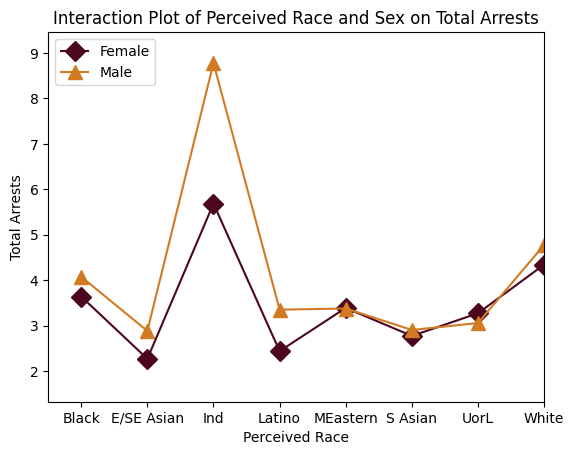

In [38]:
#https://pbpython.com/categorical-encoding.html
# create a label encoder object
le = LabelEncoder()
# encode the Perceived_Race column
df['Perceived_Race_Encoded'] = le.fit_transform(df['Perceived_Race'])

interaction_plot(x=df['Perceived_Race_Encoded'], trace=df['Sex'], response=df['TotalArrests'], colors=['#4c061d','#d17a22'], markers=['D', '^'], ms=10)
plt.xlabel('Perceived Race')
plt.ylabel('Total Arrests')
plt.xticks(ticks=[0,1, 2,3,4,5,6,7], labels=['Black','E/SE Asian','Ind','Latino','MEastern','S Asian','UorL','White'])
plt.xlim([-0.5,7])
plt.legend(labels=['Female', 'Male'], loc='upper left')
plt.title('Interaction Plot of Perceived Race and Sex on Total Arrests')

# TUKEY HSD

In [39]:
#https://towardsdatascience.com/anova-tukey-test-in-python-b3082b6e6bda
df = df.dropna(subset=['TotalArrests'])
df['Perceived_Race'] = pd.Categorical(df['Perceived_Race'])
df['Sex'] = pd.Categorical(df['Sex'])
perceived_race_categories = df['Perceived_Race'].cat.categories.astype(str)
sex_categories = df['Sex'].cat.categories.astype(str)
df['combination'] = df['Perceived_Race'].astype(str) + " / " + df['Sex'].astype(str)
sexrace_tuckey_interaction = pairwise_tukeyhsd(endog=df['TotalArrests'], groups=df['combination'], alpha=0.05)
print(sexrace_tuckey_interaction)

                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
         group1                   group2          meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------------------------
               Black / F                Black / M   0.4357 0.0055   0.0645  0.8069   True
               Black / F East/Southeast Asian / F  -1.3703    0.0  -2.1289 -0.6118   True
               Black / F East/Southeast Asian / M  -0.7573    0.0  -1.2131 -0.3015   True
               Black / F           Indigenous / F   2.0462    0.0   1.2334  2.8589   True
               Black / F           Indigenous / M   5.1442    0.0   4.5298  5.7585   True
               Black / F               Latino / F  -1.2018 0.0446  -2.3918 -0.0119   True
               Black / F               Latino / M  -0.2888 0.9629  -0.8743  0.2967  False
               Black / F       Middle-Eastern / F  -0.2501    1.0  -1.2788  0.7787  False
          

In [51]:
model2 = ols('StripSearch ~ C(Occurrence_Category, Treatment("Assault")) + C(Perceived_Race, Treatment("White")) + C(Perceived_Race, Treatment("White")):C(Occurrence_Category, Treatment("Assault"))', data=df_strip_search).fit()
sm.stats.anova_lm(model2, typ=2)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 56, but rank is 38
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
"C(Occurrence_Category, Treatment(""Assault""))",92.111430,7.0,9.143994,2.829303e-11
"C(Perceived_Race, Treatment(""White""))",45.740412,8.0,3.973110,1.052586e-04
"C(Perceived_Race, Treatment(""White"")):C(Occurrence_Category, Treatment(""Assault""))",55.324371,56.0,0.686513,9.278936e-01
Residual,7186.676103,4994.0,NaN,NaN


Text(0.5, 1.0, 'Interaction Plot of Perceived Race and Occurrence Type on Strip Search Counts')

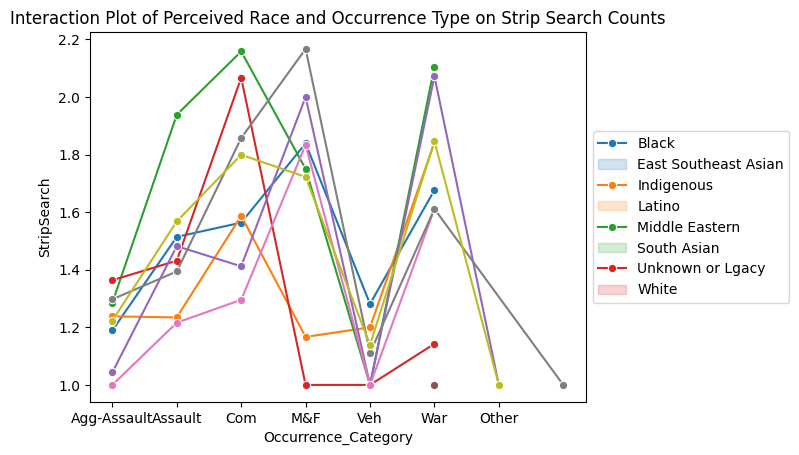

In [52]:
df_grouped = df_strip_search.groupby(['Perceived_Race', 'Occurrence_Category'])['StripSearch'].mean().reset_index()
sns.lineplot(data=df_grouped, x='Occurrence_Category', y='StripSearch', hue='Perceived_Race', marker='o')
plt.legend(labels=['Black', 'East Southeast Asian', 'Indigenous', 'Latino', 'Middle Eastern', 'South Asian', 'Unknown or Lgacy', 'White'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(ticks=[0,1, 2,3,4,5,6], labels=['Agg-Assault','Assault','Com','M&F','Veh','War','Other'])
plt.title('Interaction Plot of Perceived Race and Occurrence Type on Strip Search Counts')


Perform TUKEY HSD

In [53]:
df_strip_search['Perceived_Race'] = df_strip_search['Perceived_Race'].astype(str)
df_strip_search['Occurrence_Category'] = df_strip_search['Occurrence_Category'].astype(str)
df_strip_search['combination'] = df_strip_search.Perceived_Race + " / " + df_strip_search.Occurrence_Category
tuckey_interaction = pairwise_tukeyhsd(endog=df_strip_search['StripSearch'], groups=df_strip_search['combination'], alpha=0.05)
print(tuckey_interaction)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


                                                Multiple Comparison of Means - Tukey HSD, FWER=0.05                                                 
                        group1                                                 group2                         meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------------------------------------------------------------------
                            Black / Aggrevated Assault                                        Black / Assault    0.325 0.0678 -0.0072  0.6572  False
                            Black / Aggrevated Assault                                     Black / Compliance   0.3745 0.2329 -0.0527  0.8017  False
                            Black / Aggrevated Assault                               Black / Mischief & Fraud   0.6496 0.7656 -0.2625  1.5617  False
                            Black / Aggrevated Assault                Black / Vehicle Related (inc. Impair